# Z01.5: Extra Analyses

This notebook contains the extra analyses that supplement the paper for the first Scribal Intent Study (Z01).

## Setup and Utility Functions

In [38]:
# Imports and setup
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import os

from qlynx.file_utils import load_pkl
from qlynx.stats_utils import *
from qlynx.display_utils import render_html_to_image
from voynichlib.utils import display_voynichese
from qlynx.file_utils import store_pkl, load_pkl
from voynichlib.ProbDistribution import ProbDistribution


%reload_ext autoreload
%autoreload 2
 

# Set Global Parameters

In [2]:
do_parametric_studies = True
MAX_BAYES = np.exp(10)
MAX_PROPENSITY = 999
THRESHOLDS = {
    'p_value': 0.01,
    'ln_bayes_factor': 5
}
THRESHOLDS['bayes_factor'] = np.exp(THRESHOLDS['ln_bayes_factor'])
reference_cohort = 'MIDDLE'
smooth = None



# Load the Token Cohort Data

In [3]:
file_path = 'voynich_data/outputs/token_cohort_data.pkl'
token_cohort_data = load_pkl(file_path)

cohorts = token_cohort_data['cohorts']
cohorts_with_randoms = token_cohort_data['cohorts_with_randoms']

corpus_by_c = token_cohort_data['corpus_by_c']
pmfs_by_c = token_cohort_data['pmfs_by_c']
token_ws_by_c = token_cohort_data['token_ws_by_c']

glyph_pmfs_by_c = token_cohort_data['glyph_pmfs_by_c']
glyphs_by_c = token_cohort_data['glyphs_by_c']

# Cross-Analysis for Propensity Tokens

In [4]:
file_path = 'voynich_data/outputs/token_propensity_dfs.pkl'
token_propensity_dfs = load_pkl(file_path)
token_propensity_dfs['FIRST']


,glyph_count,N_ref,n_ref,N_x,n_x,p_ref,p_x,p_value,sig_p_value,sig_BF,propensity,bayes,binom_stat_le,binom_stat_gt
token,,,,,,,,,,,,,,
chol,4,3807,180,998,10,0.047281,0.010020,2.965859e-11,True,True,0.2,22026.465795,2.965859e-11,0.0
daiin,5,3807,178,998,42,0.046756,0.042084,2.708710e-01,False,False,0.9,1.287254,2.708710e-01,0.0
chor,4,3807,107,998,7,0.028106,0.007014,1.861640e-06,True,True,0.2,22026.465795,1.861640e-06,0.0
s,1,3807,75,998,4,0.019701,0.004008,1.964432e-05,True,True,0.2,12288.718464,1.964432e-05,0.0
chy,3,3807,72,998,1,0.018913,0.001002,1.072737e-07,True,True,0.1,22026.465795,1.072737e-07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ckheal,6,3807,1,998,0,0.000263,0.000000,7.693701e-01,False,False,0.0,1.299765,7.693701e-01,0.0
ckheor,6,3807,1,998,0,0.000263,0.000000,7.693701e-01,False,False,0.0,1.299765,7.693701e-01,0.0
oral,4,3807,1,998,1,0.000263,0.001002,2.306299e-01,False,False,3.8,1.824425,9.711125e-01,0.0


In [5]:
def make_master_table(criteria):
    def meets_criteria(row):
        return row['sig_p_value'] if criteria == 'p_value' else row['sig_BF'] if criteria == 'bayes' else (row['sig_BF']&row['sig_p_value'])
        
    token_dict = {}
    for cohort, propensity_df in token_propensity_dfs.items():
        for token, row in propensity_df.iterrows():
            if token not in token_dict:
                token_dict[token] = {}
            if cohort not in token_dict:
                token_dict[token][cohort] = {}
            token_dict[token][cohort] = 0
            if meets_criteria(row):
                token_dict[token][cohort] = 1 if row['propensity'] > 1 else -1
            pass
        pass
    pass
    # print(token_dict)
    df = pd.DataFrame(columns = ['token', 'TOP', 'FIRST', 'BEFORE', 'AFTER', 'LAST'])
    for token, pos_dict in token_dict.items():
        row_list = [token]
        count_non_zero = 0
        for col in df.columns[1:]:
            if col in pos_dict:
                row_list.append(pos_dict[col])
                count_non_zero += pos_dict[col] != 0
            else:
                row_list.append(0)
        if count_non_zero > 0:
            df.loc[len(df)] = row_list
        pass
    return df
            
master_df = make_master_table('both')


In [6]:
master_df = master_df.sort_values(by='token')
master_df

,token,TOP,FIRST,BEFORE,AFTER,LAST
40,am,0,0,0,0,1
13,chaiin,-1,-1,0,0,0
18,char,0,-1,0,0,0
37,chcphy,1,0,0,0,0
19,cheol,0,-1,0,0,0
16,cheor,0,-1,0,0,0
8,chey,0,-1,0,0,-1
9,cho,0,-1,0,0,0
0,chol,-1,-1,-1,0,-1
2,chor,0,-1,-1,0,-1


## Plot the Master Table as Heatmap

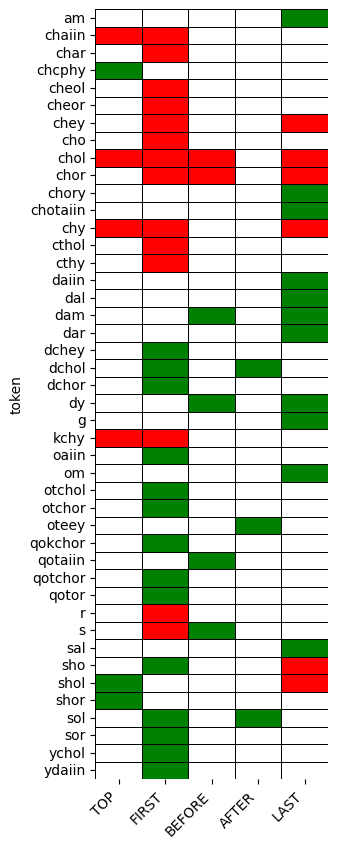

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_custom_heatmap(df):
    # Set the 'token' column as the index
    df = df.set_index('token')
    
    # Define a custom colormap: red for -1, white for 0, green for 1
    cmap = ListedColormap(['red', 'white', 'green'])
    bounds = [-1, 0, 1, 2]  # Define boundaries for color mapping
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    # Set a larger figure size to accommodate all rows
    plt.figure(figsize=(3, 10))  # You might need to adjust these dimensions based on your specific dataset
    
    # Create a heatmap using seaborn with our custom colormap and normalization
    sns.heatmap(df, annot=False, cmap=cmap, norm=norm, cbar=False, square=False,
                linewidths=0.5, linecolor='black')
    
    # Rotate x-axis labels
    plt.xticks(rotation=45, ha="right")  # Rotate labels and align right for better readability
    
    plt.show()



plot_custom_heatmap(master_df)

## Make HTML Table of Master Heatmap

In [53]:
def master_propensity_html_table_to_file(df, file_name, width, height, include_legend: bool = True):
    # Define the color mapping based on value ranges
    def color_for_value(value):
        if value == -1:
            return 'red'
        elif value == 0:
            return 'white'
        elif value == 1:
            return 'green'
        else:
            return 'white'  # Default color

        # Determine the max width needed based on the longest column header name
    # Assuming approximately 1em per character for default font settings
    max_header_length = max(len(str(col)) for col in df.columns)
    column_width = max_header_length -1.5  # Adding some extra space for padding

    # Start the HTML document
    html = '<!DOCTYPE html>\n<html>\n<head>\n'
    html += f'<style>table, th, td {{border: 1px solid black; border-collapse: collapse;}} th, td {{padding: 0px; text-align: center;}} th:not(:first-child), td:not(:first-child) {{min-width: {column_width}em; max-width: {column_width}em;}}</style>\n'
    
    html += """<style> 
        .legend-item {
            display: flex;
            align-items: center;
            margin-bottom: 5px;
        }

        .legend-color {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }

        .legend-label {
            font-size: 16px;
        }
    </style>"""
    
    html += '</head>\n<body>\n'
    # html += '<h1>High Propensity Tokens by Position</h1>'

    if include_legend:
        html += """    
    <div class='legend'>
        <div class='legend-item'>
            <div class='legend-color' style='background-color: green;'></div>
            <div class='legend-label'>Affinitive Propensity</div>
        </div>
        <div class='legend-item'>
            <div class='legend-color' style='background-color: red;'></div>
            <div class='legend-label'>Aversive Propensity</div>
        </div>
    </div>
   """
       
    # Start the HTML table, including headers at the top
    html += '<table><tr><th></th>'
    for col in df.columns:
        html += f'<th>{col}</th>'
    html += '</tr>'
    
    # Populate the table rows
    for index, row in df.iterrows():
        voynichese_value = display_voynichese(text=index, render=False)
        html += f'<tr><th>{voynichese_value}</th>'
        for col in df.columns:
            color = color_for_value(row[col])
            html += f'<td style="background-color:{color}">&nbsp;</td>'
        html += '</tr>'
    
    # Add headers at the bottom
    html += '<tr><th></th>'
    for col in df.columns:
        html += f'<th>{col}</th>'
    html += '</tr></table>\n'
    
    # End the HTML document
    html += '</body>\n</html>'
    
    if file_name:
        current_dir = os.getcwd()
        print(f"current_dir = {current_dir}")
        html_filename = file_name + '.html'
        absolute_html_file_path = os.path.join(current_dir, html_filename)
        png_filename = file_name + '.png'
        absolute_png_file_path = os.path.join(current_dir, png_filename)
        with open(html_filename, 'w') as file:
            file.write(html)
            print(f"Wrote {html_filename}")
        print(f"absolute_html_file_path = {absolute_html_file_path}")
        render_html_to_image(absolute_html_file_path, absolute_png_file_path, width=width, height=height+129, crop=False)

# Convert the DataFrame to an HTML file
file_name= 'voynich_data/outputs/T_Propensity_Token_Master_Table'
master_propensity_html_table_to_file(master_df.set_index('token'), file_name, width=400, height=500)
print(f"HTML table written to {file_name}")


current_dir = /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24
Wrote voynich_data/outputs/T_Propensity_Token_Master_Table.html
absolute_html_file_path = /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24/voynich_data/outputs/T_Propensity_Token_Master_Table.html
Document Dimensions: 441 1360
Screenshot saved to: /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24/voynich_data/outputs/T_Propensity_Token_Master_Table.png
HTML table written to voynich_data/outputs/T_Propensity_Token_Master_Table


## Split the Master Propensity Table for Easier Presentation

In [54]:
num_parts = 3
rows_per_part = int(np.ceil(len(master_df) / num_parts))
rough_height_in_pixels = 20*rows_per_part
rough_width_in_pixels = 400

In [55]:
df_part = []
for i in range(num_parts):
    start = i * rows_per_part
    end = min(start  + rows_per_part, len(master_df))
    df = master_df[start:end]
    file_name= f"voynich_data/outputs/T_Propensity_Token_Master_Table_Part_{i+1}"
    master_propensity_html_table_to_file(df.set_index('token'), 
                       file_name, 
                       width=rough_width_in_pixels, 
                       height=rough_height_in_pixels,
                      include_legend = False)
    print(f"Master Table Part {i+1} written to {file_name}")
    print(f"Master Propensity Table, Part {i+1}")


current_dir = /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24
Wrote voynich_data/outputs/T_Propensity_Token_Master_Table_Part_1.html
absolute_html_file_path = /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24/voynich_data/outputs/T_Propensity_Token_Master_Table_Part_1.html
Document Dimensions: 440 483
Screenshot saved to: /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24/voynich_data/outputs/T_Propensity_Token_Master_Table_Part_1.png
Master Table Part 1 written to voynich_data/outputs/T_Propensity_Token_Master_Table_Part_1
Master Propensity Table, Part 1
current_dir = /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24
Wrote voynich_data/outputs/T_Propensity_Token_Master_Table_Part_2.html
absolute_html_file_path = /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24/voynich_data/outputs/T_Propensity_Token_Master_Table_Part_2.html
Document Dimensions: 432 483
Screenshot saved to: /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24/voynich_data/outputs/T_Propensity_Token_Master_Table_Part_2.png
Master Table Part 2 written to voynich_

In [56]:
file_name= 'voynich_data/outputs/T_Propensity_Token_Master_Table_Part_1'
master_propensity_html_table_to_file(df1.set_index('token'), file_name, width=500, height=600)
print(f"HTML table written to {file_name}")

print("Master Propensity Table, Part 1")
df1.head(top_length)


current_dir = /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24
Wrote voynich_data/outputs/T_Propensity_Token_Master_Table_Part_1.html
absolute_html_file_path = /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24/voynich_data/outputs/T_Propensity_Token_Master_Table_Part_1.html
Document Dimensions: 500 733
Screenshot saved to: /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24/voynich_data/outputs/T_Propensity_Token_Master_Table_Part_1.png
HTML table written to voynich_data/outputs/T_Propensity_Token_Master_Table_Part_1
Master Propensity Table, Part 1


,token,TOP,FIRST,BEFORE,AFTER,LAST
0,chol,-1,-1,-1,0,-1
1,daiin,0,0,0,0,1
2,chor,0,-1,-1,0,-1
3,s,0,-1,1,0,0
4,chy,-1,-1,0,0,-1
5,cthy,0,-1,0,0,0
6,shol,1,0,0,0,-1
7,sho,0,1,0,0,-1
8,chey,0,-1,0,0,-1
9,cho,0,-1,0,0,0


In [57]:
file_name= 'voynich_data/outputs/T_Propensity_Token_Master_Table_Part_2'
master_propensity_html_table_to_file(df2.set_index('token'), file_name, width=500, height=600)
print(f"HTML table written to {file_name}")

print("Master Propensity Table, Part 2")
df2.head(bottom_length)


current_dir = /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24
Wrote voynich_data/outputs/T_Propensity_Token_Master_Table_Part_2.html
absolute_html_file_path = /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24/voynich_data/outputs/T_Propensity_Token_Master_Table_Part_2.html
Document Dimensions: 500 733
Screenshot saved to: /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24/voynich_data/outputs/T_Propensity_Token_Master_Table_Part_2.png
HTML table written to voynich_data/outputs/T_Propensity_Token_Master_Table_Part_2
Master Propensity Table, Part 2


,token,TOP,FIRST,BEFORE,AFTER,LAST
22,dam,0,0,1,0,1
23,dchor,0,1,0,0,0
24,otchor,0,1,0,0,0
25,qotor,0,1,0,0,0
26,qokchor,0,1,0,0,0
27,sor,0,1,0,0,0
28,dchol,0,1,0,1,0
29,oteey,0,0,0,1,0
30,oaiin,0,1,0,0,0
31,qotaiin,0,0,1,0,0


# Append Data from Bunn Research to Master Table

Bunn has listed tokens by their appearance in certain positions. These, however, are only based on appearance frequencies (prevelance).  It is helpful to compare them to the results from the propensity analysis. 
The Bunn data (from:  ) is as follows:
 * Words often in First Position – dai, daiin, dair, sai, saiin, sar, sol
 * Words often in Last Position – am, dy, oky, oly, qoky
 * Words never in First Position – ai, aiin, air, al, am, chcthy, chdy, checkhy, cheedy, cheky, cheody, chody, chy, dy, kai, kedy, keedy, okal, okedy, oky, oly, opchedy, otai, otal, otar, oty, raiin, shckhy
 * Words never in Last Position – ai, cheo, dai, kai, kaiin, okai, otai, qokai, qokain, qotai, sai, shckhy, sheedy
 * Words never in First or Last Position – ai, kai, otai, shckhy



<div style='color:red;'><b>Unfortunately, Bunn looks only at Currier B and as a result is the two data sets are mutually exclusive.
So this auxiliary analysis had been removed.</b></div>

# Glyph Propensities

In [1]:
def compile_glyph_propensity_df(target_cohort, reference_cohort, p_value_threshold, bayes_threshold):
    top_token_length_dict = get_top_vocabulary_tokens_lengths_dict(reference_cohort)
    df = pd.DataFrame(columns = ['glyph',  'N_ref', 'n_ref', 'N_x', 'n_x', 'p_ref', 'p_x',  'p_value', 'sig_p_value', 'sig_BF', 'propensity', 'bayes', 'binom_stat_le', 'binom_stat_gt'])
    glyphs = set(glyphs_by_c['ALL'])
    
    for glyph in glyphs:
        pmf_ref = glyph_pmfs_by_c[reference_cohort]
        N_ref = pmf_ref.total_count
        n_ref = pmf_ref.count(glyph) if N_ref > 0 else 0
        p_ref = pmf_ref.prob(glyph, smooth=smooth)
        if p_ref == 0:
            continue

        pmf_x = glyph_pmfs_by_c[target_cohort]                        
        N_x = pmf_x.total_count
        n_x = pmf_x.count(glyph)  if N_x > 0 else 0
        p_x = pmf_x.prob(glyph, smooth=smooth)
        
        p_value = calculate_binomial_probability(n_x, N_x, p_ref)

        if n_x == 0:
            bayes_factor = 1/MAX_BAYES
        else:
            bayes_factor = bayes_factor_binomial(n_x, N_x, p_x, p_ref)
            bayes_factor = min(MAX_BAYES, bayes_factor)
        bayes_factor = int(bayes_factor)
        binom_stat_le =  binom.cdf(n_x, N_x, p_ref)        
        binom_stat_gt =  binom.cdf(n_x, N_x, 1. -p_ref)        

        if p_x ==  0.:
            propensity = -MAX_PROPENSITY
        else:
            propensity = p_x/p_ref  if p_ref > 0 else MAX_PROPENSITY
        pass        
            
        verdict_p_value = p_value <= p_value_threshold
        verdict_bayes_factor = bayes_factor >= bayes_threshold

        df.loc[len(df)] = [glyph,
                           N_ref,
                           n_ref,
                           N_x,
                           n_x,
                           p_ref,
                           p_x,
                           p_value,
                           verdict_p_value,
                           verdict_bayes_factor,
                           np.round(propensity,1),
                           bayes_factor,
                          binom_stat_le,
                          binom_stat_gt]
        pass
    df.set_index('glyph', inplace=True)
    pass
    return df

# Word Splits Across Drawings

In [11]:
study_corpus_file = 'voynich_data/outputs/Study_Corpus_for_Positional_Tokens_Analysis.pkl'
study_corpus = load_pkl(study_corpus_file)

In [14]:
print(study_corpus.summary())


--------------------------------------------------------------------------------
Corpus: Study Corpus for Positional Tokens Analysis
	From Transliteration file 'voynich_data/standard_ivtff/ZL_N_ext_Eva_3a'
		Alphabet:'Eva-' (ZL),    Alphabet Version:2.0
		Transliteration Version: 2.0
Selection Criteria: {
    "fagin_davis_scribes": [
        "1"
    ],
    "illustrations": "H",
    "locus_generic_types": "P",
    "paragraph_end_token": false,
    "unambiguous_token": true
}
	Num folios : 		        95
	Num lines  : 		     1,223
	Num tokens : 		     7,660
	Num glyphs : 		    36,177
	Num Unique tokens: 	     2,355
	Num Unique glyphs: 	        67
--------------------------------------------------------------------------------


In [ ]:
all_Tokens = study_corpus.Tokens()
all_tokens = study_corpus.tokens()
pmf = ProbDistribution(all_tokens)


## Collect all tokens that span across single drawing

In [137]:
unique_tokens = set(study_corpus.tokens())
print(f"Number tokens = {len(all_tokens)}, num unique= {len(set(unique_tokens))}")
split_token_by_joined_token = dict()
first_part = None
second_part = None
i = 0
joined_tokens = []
split_tokens = []

#Collect dual splits
for token in all_Tokens:
    if token.get('post_drawing'):
        if first_part is not None:
            second_part = token.get('token')
            joined_token = first_part + second_part
            i += 1
            if joined_token in unique_tokens:
                split_token = (first_part, second_part)
                split_token_by_joined_token[joined_token] = split_token
                joined_tokens.append(joined_token)
                split_tokens.append(split_token)
            first_part = None
    if token.get('pre_drawing'):
        first_part = token.get('token')
    pass

# Collect triple splits
for i, row in tokens_df.iterrows():   
    if i == 0 or i == len(tokens_df)-1:
        continue    
    if row['pre_drawing'] and row['post_drawing']:
        first_part = tokens_df.loc[i-1]['token']
        second_part = row['token']
        third_part = tokens_df.loc[i+1]['token']
        joined_token = first_part + second_part + third_part
        if joined_token in unique_tokens:
            split_token = (first_part, second_part, third_part)
            split_token_by_joined_token[joined_token] = split_token
            joined_tokens.append(joined_token)
            split_tokens.append(split_token)
pass


# Convert to a dataframe
split_tokens_df = pd.DataFrame(columns = ['split_token', 
                                          'count_split_token',
                                          'joined_token', 
                                          'count_joined_token', 
                                         'part_1',
                                         'count_part_1',
                                         'part_2',
                                         'count_part_2',
                                         'part_3',
                                         'count_part_3',
                                         ])
                               

for joined_token in sorted(list(set(joined_tokens))):
    count_joined_token = pmf.count(joined_token)
    split_token = split_token_by_joined_token[joined_token]
    part_1 = split_token[0]
    part_2 = split_token[1]
    part_3 = split_token[2] if len(split_token) > 2 else ''
    
    split_token_seq = ' - '.join(split_token)
    count_split_token = split_tokens.count(split_token)
    count_part_1 = pmf.count(part_1)
    count_part_2 = pmf.count(part_2)
    count_part_3 = pmf.count(part_3) if len(part_3) >0 else ''
    
    split_tokens_df.loc[len(split_tokens_df)] = [ split_token_seq,
                                                  count_split_token,
                                                  joined_token,
                                                  count_joined_token,
                                                  part_1,
                                                  count_part_1,
                                                  part_2,
                                                  count_part_2,
                                                  part_3,
                                                  count_part_3
                                                ]
    

# print(f"Number of split_candidates = {len(split_token_candidates)},  Number unique = {len(set(split_token_candidates))}")

split_tokens_df
        
    


Number tokens = 7660, num unique= 2355


,split_token,count_split_token,joined_token,count_joined_token,part_1,count_part_1,part_2,count_part_2,part_3,count_part_3
0,chy - daiin,2,chydaiin,1,chy,97,daiin,365,,
1,dal - s,1,dals,3,dal,42,s,143,,
2,dar - chor,1,darchor,1,dar,65,chor,146,,
3,dy - dy,1,dydy,1,dy,100,dy,100,,
4,dy - oty,2,dyoty,1,dy,100,oty,39,,
5,ol - dy,1,oldy,2,ol,60,dy,100,,
6,ol - o,1,olo,2,ol,60,o,47,,
7,o - r,1,or,57,o,47,r,37,,
8,or - al,1,oral,2,or,57,al,13,,
9,r - chy,1,rchy,1,r,37,chy,97,,


In [138]:
def split_token_html_table_to_file(df, file_name, width, height):

        # Determine the max width needed based on the longest column header name
    # Assuming approximately 1em per character for default font settings
    max_header_length = max(len(str(col)) for col in df.columns)
    column_width = max_header_length -1.5  # Adding some extra space for padding

    # Start the HTML document
    html = '<!DOCTYPE html>\n<html>\n<head>\n'

    
    html = """
!DOCTYPE html>\n
<html>
<head>
    <style>
        .nowrap {
            white-space: nowrap;
        }
        h3 {
            margin-left: auto;
            margin-right: auto;
        }
        table {
            border: 3px solid black;
            border-collapse: collapse;
            margin-left: auto;
            margin-right: auto;
        }

        th, td {
            border: 1px solid black;
            text-align: center;
        }

       .header-row {
            background-color: #7AA4F8;
        }     
        table td, table th {
            padding-left: 5px;
            padding-right: 5px;
        }
        
        tbody tr:nth-child(even) {
            background-color: #FEEFC2; /*#FFFFD9; light beige for odd rows */
        }

        tbody tr:nth-child(odd) {
            background-color: white; /* white for even rows */
        }
    </style>
</head>
<body>"""    
       
    # Start the HTML table, including headers at the top
    html += '<table><tr>'
    html += f'<th class="header-row"  colspan=3>Split Token</th>'
    html += f'<th class="header-row"   colspan=2>Joined Token</th>'
    html += f'<th class="header-row"   colspan=2>Part 1</th>'
    html += f'<th class="header-row"   colspan=2>Part 2</th>'
    html += f'<th class="header-row"   colspan=2>Part 3</th>'
    html += '</tr>'
    
    # Populate the table rows
    for index, row in df.iterrows():
        voynichese_split_token = display_voynichese(text=row['split_token'], render=False)
        # print(voynichese_split_token)
        voynichese_joined_token = display_voynichese(text=row['joined_token'], render=False)
        voynichese_part_1 = display_voynichese(text=row['part_1'], render=False)
        voynichese_part_2 = display_voynichese(text=row['part_2'], render=False)
        voynichese_part_3 = display_voynichese(text=row['part_3'], render=False)
        html += '<tr>'
        html += f"<td class='nowrap'>{voynichese_split_token}</td>"
        html += f"<td>{ row['split_token'] }</td>"
        html += f"<td>{row['count_split_token']}</td>"
        html += f"<td>{voynichese_joined_token}</td>"
        html += f"<td>{row['count_joined_token']}</td>"
        html += f"<td>{voynichese_part_1}</td>"
        html += f"<td>{row['count_part_1']}</td>"
        html += f"<td>{voynichese_part_2}</td>"
        html += f"<td>{row['count_part_2']}</td>"
        html += f"<td>{voynichese_part_3}</td>"
        html += f"<td>{row['count_part_3']}</td>"
        html += '</tr>'
    
    # Add headers at the bottom
    html += '</table>\n'
    
    # End the HTML document
    html += '</body>\n</html>'
    
    if file_name:
        current_dir = os.getcwd()
        print(f"current_dir = {current_dir}")
        html_filename = file_name + '.html'
        absolute_html_file_path = os.path.join(current_dir, html_filename)
        png_filename = file_name + '.png'
        absolute_png_file_path = os.path.join(current_dir, png_filename)
        with open(html_filename, 'w') as file:
            file.write(html)
            print(f"Wrote {html_filename}")
        print(f"absolute_html_file_path = {absolute_html_file_path}")
        render_html_to_image(absolute_html_file_path, absolute_png_file_path, width=width, height=height+129, crop=False)

# Convert the DataFrame to an HTML file
file_name= 'voynich_data/outputs/T_Split_Tokens_Table'
split_token_html_table_to_file(split_tokens_df, file_name, width=600, height=500)
print(f"HTML table written to {file_name}")

current_dir = /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24
Wrote voynich_data/outputs/T_Split_Tokens_Table.html
absolute_html_file_path = /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24/voynich_data/outputs/T_Split_Tokens_Table.html
Document Dimensions: 600 629
Screenshot saved to: /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24/voynich_data/outputs/T_Split_Tokens_Table.png
HTML table written to voynich_data/outputs/T_Split_Tokens_Table
